## Multi Layer Perceptron ( MLP )  __________________________________

Importar as bibliotecas

In [231]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import normalize 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics._classification import classification_report
from sklearn.model_selection import GridSearchCV

### Carregar Base de Dados

In [232]:
data = pd.read_csv('Data\data.csv').dropna()
data.sample(10)

,Circularidade,Razão Eixos,Intencidade Média,Classe
115,0.419015,0.269095,0.160814,3
85,0.548717,0.337306,0.180460,2
22,0.738128,0.570164,0.273607,0
98,0.547284,0.333181,0.259699,2
49,0.716470,0.561599,0.252535,1
82,0.598561,0.359636,0.169839,2
113,0.460907,0.292125,0.137550,3
15,0.636819,0.469269,0.209466,0
21,0.744865,0.536820,0.271205,0
161,0.728582,0.599077,0.387494,4


In [233]:
data['Classe'].value_counts()


1    39
5    39
2    37
0    35
4    29
3    28
Name: Classe, dtype: int64

In [234]:
x = data.drop('Classe', axis=1)
y = data['Classe']
X_normalized = normalize(x, axis=0)

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.1)

sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)


In [235]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(200,150,60), alpha= 0.05,
                        learning_rate= 'constant',
                        max_iter = 150,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, trainY)


c:\Users\bianc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.05, hidden_layer_sizes=(200, 150, 60), max_iter=150)

In [236]:
y_pred = mlp_clf.predict(testX_scaled)
print(y_pred)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print(classification_report(testY, y_pred))



[2 5 3 2 4 3 2 0 4 2 5 5 2 5 2 5 1 4 3 1 1]
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



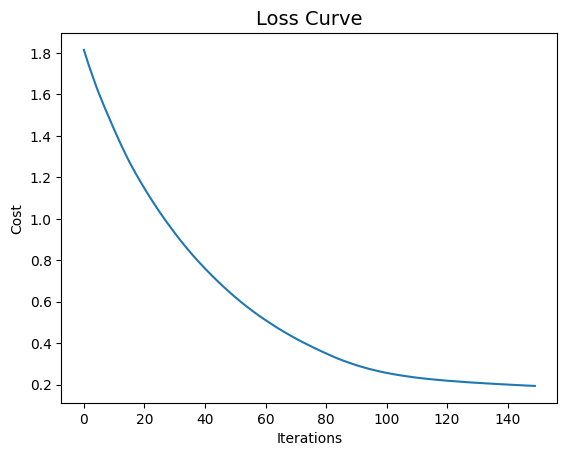

In [237]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [238]:
""" param_grid = {
    'hidden_layer_sizes': [(200,150,60), (150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150,300],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

grid_predictions = grid.predict(testX_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions))) """

" param_grid = {\n    'hidden_layer_sizes': [(200,150,60), (150,100,50), (120,80,40), (100,50,30)],\n    'max_iter': [50, 100, 150,300],\n    'activation': ['tanh', 'relu'],\n    'solver': ['sgd', 'adam'],\n    'alpha': [0.0001, 0.05],\n    'learning_rate': ['constant','adaptive'],\n}\n\ngrid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)\ngrid.fit(trainX_scaled, trainY)\n\nprint(grid.best_params_) \n\ngrid_predictions = grid.predict(testX_scaled) \n\nprint('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions))) "

In [239]:
# salvar modelo
import pickle
# salvar o modelo XGBoost (xgb_model) no arquivo sale_xgboost.pkl
with open('sale_xgboost.pkl', 'wb') as file:
    pickle.dump(mlp_clf, file)